# Maximum and minimum temperatures by day

This is an example of making a (useful?) plot using the functions contained in GetDataFrame.jl and the Gadfly plotting system. Gadfly is based on Grammar of Graphics so it's quite similar to ggplot2 (in R) or plotnine (in python).

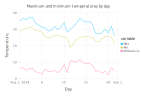

In [5]:
using Gadfly
using DataFrames
using Dates

#+
# This source file contains functions to extract dataframes from the
# hdf5 files
#-
include("GetDataFrame.jl")

#+
# Read dataframe from hdf5, subset to just time and temperature
#-
rawds = getRawDF("../data/monthly-201808.hdf5")[[:time,:temperature]]

#+
# Use the Split-Apply-Combine pattern in Julia to group the observations
# by date and getting the maximum and minimum temperature values. Then
# sort the resulting dataframe and add a difference column
#-
rawds[:day] = floor.(rawds[:time],Dates.Day)
byday = by(rawds,:day) do df
    DataFrame(Max=maximum(df.temperature),Min=minimum(df.temperature))
end
sort!(dropmissing!(byday))
byday[:Difference] = byday[:Max] - byday[:Min]

#+
# Plot the data using Gadfly
#-
plot(stack(byday), x=:day, y=:value, color=:variable, Geom.line,
    Guide.title("Maximum and minimum temperatures by day"),
    Guide.xlabel("Day"), Guide.ylabel("Temperature"))